# SIRD model for disease propagation

Assume the total population is:

\begin{equation}
N = S(t) + E(t) + I(t) + R(t)  
\end{equation}

With,

$S$: the susceptible population

$E$: the exposed population

$I$: the infected pupulation and 

$R$: the recovered population

These quantities evolve according to the following the dynamical ODEs:

\begin{eqnarray}
\frac{dS}{dt} &=& -r S(t) I(t)\\
\frac{dI}{dt} &=&  r S(t)I(t) -(\alpha+\delta) I(t)\\
\frac{dR}{dt} &=&  \alpha I(t) \\ 
\frac{dD}{dt} &=&  \delta I(t)
\end{eqnarray}

The coefficients $r$, $\alpha$ and $\delta$ correspond to the Infection, Recovery and Death rates, respectively.  

In the work *Analysis and forecast of COVID-19 spreading in China, Italy and France*, and a subsequent update, (Fanelli & Piazza) use collected data and solve a set of  the differential equations within  a stochastic differential evolution algorithm (R. Storn and K. Price, Journal of Global Optimization 11, 341, 1997). For each country they find the set of initial parameters [$S_0$, r, $\alpha$, $\delta$]. **Not sure here why $S_0$ enters in this fit**. 

Since Brazil and Colombia  are now at the beginning of the exponential phase and only two deaths are reported, the optimization algorithm can not be used.  Thus, I run the models with the obtained parameters for other countries, China, Italy and Korea, and plotted the results of the simulations comparing with the infected number of Brazil and Colombia, from the first detected case on 2020-02-27 and 2020-03-07, respectively. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd
from scipy.integrate import odeint

In [2]:
def sird(N,r,alpha,delta):
    m = 4   # number of equations 
    n = 720 # time steps
    
    tmin = 37   # starting time
    tmax = 360. # ending time
    t = np.linspace(tmin,tmax,n)
    
    # Initial conditions
    
    x0 = N,1.,0.,0.
    sol = odeint(sird_func,x0,t,args=(r,alpha,delta))
        
    return sol[:,0], sol[:,1], sol[:,2], sol[:,3], t

In [3]:
def sird_func(x, t, *args):
    
    S,I,R,D = x
    r, alpha, delta = args
    
    dSdt = -r*S*I
    dIdt =  r*S*I - (alpha+delta)*I
    dRdt =  alpha*I
    dDdt =  delta*I
    
    return dSdt,dIdt,dRdt,dDdt

In [4]:
sI, iI, rI, dI, tI = sird(N=4.13e4,r=7.9e-6,alpha=2.13e-2,delta=1.63e-2)
sC, iC, rC, dC, tC = sird(N=8.33e4,r=3.95e-6,alpha=3.53e-2,delta=3.1e-3)
sK, iK, rK, dK, tK = sird(N=9.310e3,r=2.458e-5,alpha=4.10e-3,delta=1.2e-3)
sL, iL, rL, dL, tL = sird(N=2.6244e4,r= 1.1029e-5,alpha=4.32e-2,delta=2.62e-2)

<IPython.core.display.Javascript object>


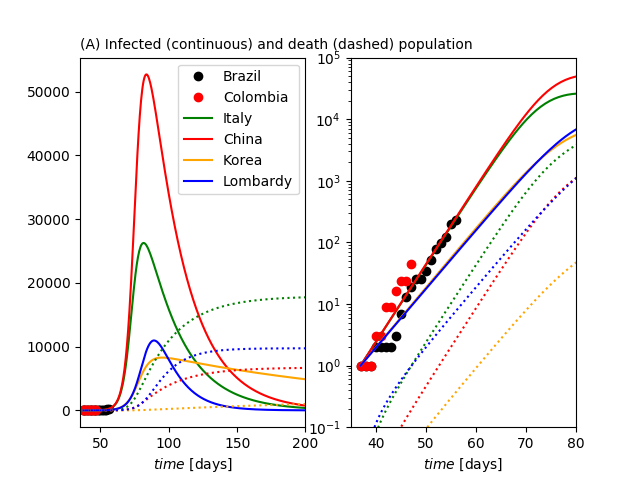

Text(0.5, 0, '$time$ [days]')

In [5]:
%matplotlib notebook
tc = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
tcD = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv')
Brazil = np.array(tc.Brazil)
BrazilD = np.array(tcD.Brazil)
time = np.array(tc.date)
ii = np.argwhere(np.isnan(Brazil)==False)
ii = ii.T[0,:]

Colombia = np.array(tc.Colombia)
jj = np.argwhere(np.isnan(Colombia)==False)
jj = jj.T[0,:] 
jjj = jj-(jj[0]-ii[0])

fig, ax = plt.subplots(1,2)
ax[0].set_title('(A) Infected (continuous) and death (dashed) population ',fontsize=10,loc='left')

ax[0].plot(ii,Brazil[ii],'o',label='Brazil',c='k')
ax[0].plot(jjj,Colombia[jj],'o',label='Colombia',c='red')

ax[0].plot(tI,iI,label='Italy',c='g')
ax[0].plot(tC,iC,label='China',c='r')

ax[0].plot(tK,iK,label='Korea',c='orange')
ax[0].plot(tL,iL,label='Lombardy',c='b')

ax[0].plot(tI,dI,linestyle='dotted',c='g')
ax[0].plot(tC,dC,linestyle='dotted',c='r')
ax[0].plot(tK,dK,linestyle='dotted',c='orange')
ax[0].plot(tL,dL,linestyle='dotted',c='b')

ax[0].set_xlabel(r'$time$ [days]')
xmin=35
xmax=200
ax[0].set_xlim(xmin,xmax)
plt.yscale('log')
ax[0].legend()

ax[1].plot(ii,Brazil[ii],'o',label='Brazil',c='k')
ax[1].plot(jjj,Colombia[jj],'o',label='Colombia',c='red')
ax[1].plot(tI,iI,label='Italy',c='g')
ax[1].plot(tC,iC,label='China',c='r')
ax[1].plot(tK,iK,label='Korea',c='orange')
ax[1].plot(tL,iL,label='Lombardy',c='b')

ax[1].plot(tI,dI,linestyle='dotted',c='g')
ax[1].plot(tC,dC,linestyle='dotted',c='r')
ax[1].plot(tK,dK,linestyle='dotted',c='orange')
ax[1].plot(tL,dL,linestyle='dotted',c='b')
ymin=0.1
ymax=1e5
xmin=35
xmax=80
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlim(xmin,xmax)
ax[1].set_xlabel(r'$time$ [days]')

**Results**

* Note in Figure (A) how Brazil is following closely the path of China and Italy. Korea implemente early Non-Pharmaceutical intervations together with a broad testing, which, among other things, allows to know the reality.

* Note in the RHS panel that the first death in the China simulation happens on day 52, roughly the same day of the first death in Brazil. 

* Colombia is growing at a faster rate. 

## Suppression by non-pharmaceutical interventions

Here I include a strong suppression of the transmission by decreasing $r$ by a factor of $5$.  This suppression continues, so far, for the entire time of the simulation, $1$ yr. This is unrealistic, but later on more realistic cases could be implemented.  The intervention starts on the 55th day after the first case confirmed, this is 2020-03-16.


In [6]:
def sird_npi(N,r,alpha,delta):
    m = 4   # number of equations 
    n = 720 # time steps
    
    tmin = 37   # starting time
    tmax = 360. # ending time
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    
    # Initial conditions
    
    x0 = N,1.,0.,0.
    
    sol = odeint(sird_func_npi,x0,t,args=(r,alpha,delta))
        
    return sol[:,0], sol[:,1], sol[:,2], sol[:,3], t

In [7]:
def sird_func_npi(x, t, *args):
    
    S,I,R,D = x
    r0, alpha, delta = args
    t1 = 55.    # day of starting mitigation
    r1 = r0/5.  # decrease in transmission
    wT = 2.     # speed of implementation
    
    r = r0 + 0.5*(r1 - r0)*(1. + erf((t - t1)/wT))
    
    dSdt = -r*S*I
    dIdt =  r*S*I - (alpha+delta)*I
    dRdt =  alpha*I
    dDdt =  delta*I
    
    return dSdt,dIdt,dRdt,dDdt

In [8]:
sKn, iKn, rKn, dKn, tKn = sird_npi(N=9.310e3,r=2.458e-5,alpha=4.10e-3,delta=1.2e-3)
sCn, iCn, rCn, dCn, tCn = sird_npi(N=8.33e4,r=3.95e-6,alpha=3.53e-2,delta=3.1e-3)

<IPython.core.display.Javascript object>


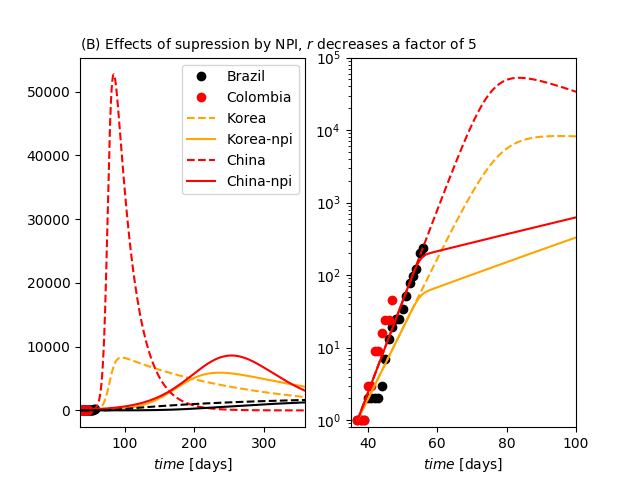

Text(0.5, 0, '$time$ [days]')

In [9]:
%matplotlib notebook
tc = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
Brazil = np.array(tc.Brazil)
time = np.array(tc.date)
ii = np.argwhere(np.isnan(Brazil)==False)
ii = ii.T[0,:]

fig, ax = plt.subplots(1,2)
ax[0].set_title('(B) Effects of supression by NPI, $r$ decreases a factor of 5',fontsize=10,loc='left')

ax[0].plot(ii,Brazil[ii],'o',label='Brazil',c='k')
ax[0].plot(jjj,Colombia[jj],'o',label='Colombia',c='red')

ax[0].plot(tK,iK,label='Korea',c='orange',linestyle='dashed')
ax[0].plot(tK,iKn,label='Korea-npi',c='orange')
ax[0].plot(tC,iC,label='China',c='r',linestyle='dashed')
ax[0].plot(tC,iCn,label='China-npi',c='r')

ax[0].plot(tK,dK, linestyle='dashed',c='k')
ax[0].plot(tK,dKn,linestyle='-',c='k')
#ax[0].plot(tC,dC,c='grey',linestyle='dashed')
#ax[0].plot(tC,dCn,c='grey')

ax[0].set_xlabel(r'$time$ [days]')
xmin=35
xmax=360
ax[0].set_xlim(xmin,xmax)
plt.yscale('log')
ax[0].legend()

ax[1].plot(ii,Brazil[ii],'o',label='Brazil',c='k')
ax[1].plot(jjj,Colombia[jj],'o',label='Colombia',c='red')

ax[1].plot(tK,iK,label='Korea',c='orange',linestyle='dashed')
ax[1].plot(tK,iKn,label='Korea-npi',c='orange')
ax[1].plot(tC,iC,label='China',c='r',linestyle='dashed')
ax[1].plot(tC,iCn,label='China-npi',c='r')

ymin=0.8
ymax=1e5
xmin=35
xmax=100
ax[1].set_ylim(ymin,ymax)
ax[1].set_xlim(xmin,xmax)

ax[1].set_xlabel(r'$time$ [days]')

**Results**

* Both tested cases, Korea and China, move the maximum of the infection peak by several months and decreased the  number of infected people. 

* The decrease in Infected people is dramatical in the simulation of China, which could apply to Brazil. 

* Strong measurements need to be taken, and the time is now.